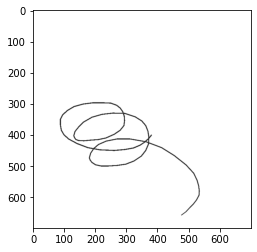

In [ ]:
import base64

from PIL import Image
from io import BytesIO

import matplotlib.pyplot as plt
import matplotlib.image as img

import numpy as np
# base64_img의 값이 서버에 올린 값 (이미지를 base64로 인코딩한 값)
base64_img = "data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAArwAAAK8CAYAAAANumxDAAAAAXNSR0IArs4c6QAAIABJREFUeF7t3WuwnVV5B/AVLoEAqZeGUSil2BZhWosJ4Y7YJCKKF3CgtApiVcQOfICxLRCrdOiIUwodW3AKlkpLAT8oYgWhaGQSCjQEkpALfkB0aEXGIAVKhQCBJKezDt2n++zsffbtva73d2YYL9l7rfX8nhXO/7xnve+eNTExMRF8ESBAgAABAgQIEEhUYJbAm2hnlUWAAAECBAgQIDApIPDaCAQIECBAgAABAkkLCLxJt1dxBAgQIECAAAECAq89QIAAAQIECBAgkLSAwJt0exVHgAABAgQIECAg8NoDBAgQIECAAAECSQsIvEm3V3EECBAgQIAAAQICrz1AgAABAgQIECCQtIDAm3R7FUeAAAECBAgQICDw2gMECBAgQIAAAQJJCwi8SbdXcQQIECBAgAABAgKvPUCAAAECBAgQIJC0gMCbdHsVR4AAAQIECBAgIPDaAwQIECBAgAABAkkLCLxJt1dxBAgQIECAAAECAq89QIAAAQIECBAgkLSAwJt0exVHgAABAgQIECAg8NoDBAgQIECAAAECSQsIvEm3V3EECBAgQIAAAQICrz1AgAABAgQIECCQtIDAm3R7FUeAAAECBAgQICDw2gMECBAgQIAAAQJJCwi8SbdXcQQIECBAgAABAgKvPUCAAAECBAgQIJC0gMCbdHsVR4AAAQIECBAgIPDaAwQIECBAgAABAkkLCLxJt1dxBAgQIECAAAECAq89QIAAAQIECBAgkLSAwJt0exVHgAABAgQIECAg8NoDBAgQIECAAAECSQsIvEm3V3EECBAgQIAAAQICrz1AgAABAgQIECCQtIDAm3R7FUeAAAECBAgQICDw2gMECBAgQIAAAQJJCwi8SbdXcQQIECBAgAABAgKvPUCAAAECBAgQIJC0gMCbdHsVR4AAAQIECBAgIPDaAwQIECBAgAABAkkLCLxJt1dxBAgQIECAAAECAq89QIAAAQIECBAgkLSAwJt0exVHgAABAgQIECAg8NoDBAgQIECAAAECSQsIvEm3V3EECBAgQIAAAQICrz1AgAABAgQIECCQtIDAm3R7FUeAAAECBAgQICDw2gMECBAgQIAAAQJJCwi8SbdXcQQIECBAgAABAgKvPUCAAAECBAgQIJC0gMCbdHsVR4AAAQIECBAgIPDaAwQIECBAgAABAkkLCLxJt1dxBAgQIECAAAECAq89QIAAAQIECBAgkLSAwJt0exVHgAABAgQIECAg8NoDBAgQIECAAAECSQsIvEm3V3EECBAgQIAAAQICrz1AgAABAgQIECCQtIDAm3R7FUeAAAECBAgQICDw2gMECBAgQIAAAQJJCwi8SbdXcQQIECBAgAABAgKvPUCAAAECBAgQIJC0gMCbdHsVR4AAAQIECBAgIPDaAwQIECBAgAABAkkLCLxJt1dxBAgQIECAAAECAq89QIAAAQIECBAgkLSAwJt0exVHgAABAgQIECAg8NoDBAgQIECAAAECSQsIvEm3V3EECBAgQIAAAQICrz1AgAABAgQIECCQtIDAm3R7FUeAAAECBAgQICDw2gMECBAgQIAAAQJJCwi8SbdXcQQIECBAgAABAgKvPUCAAAECBAgQIJC0gMCbdHsVR4AAAQIECBAgIPDaAwQIECBAgAABAkkLCLxJt1dxBAgQIECAAAECAq89QIAAAQIECBAgkLSAwJt0exVHgAABAgQIECAg8NoDBAgQIECAAAECSQsIvEm3V3EECBAgQIAAAQICrz1AgAABAgQIECCQtIDAm3R7FUeAAAECBAgQICDw2gMECBAgQIAAAQJJCwi8SbdXcQQIECBAgAABAgKvPUCAAAECBAgQIJC0gMCbdHsVR4AAAQIECBAgIPDaAwQIECBAgAABAkkLCLxJt1dxBAgQIECAAAECAq89QIAAAQIECBAgkLSAwJt0exVHgAABAgQIECAg8NoDBAgQIECAAAECSQsIvEm3V3EECBAgQIAAAQICrz1AgAABAgQIECCQtIDAm3R7FUeAAAECBAgQICDw2gMECBAgQIAAAQJJCwi8SbdXcQQIECBAgAABAgKvPUCAAAECBAgQIJC0gMCbdHsVR4AAAQIECBAgIPDaAwQIECBAgAABAkkLCLxJt1dxBAgQIECAAAECAq89QIAAAQIECBAgkLSAwJt0exVHgAABAgQIECAg8NoDBAgQIECAAAECSQsIvEm3V3EECBAgQIAAAQICrz1AgAABAgQIECCQtIDAm3R7FUeAAAECBAgQICDw2gMECBAgQIAAAQJJCwi8SbdXcQQIECBAgAABAgKvPUCAAAECBAgQIJC0gMCbdHsVR4AAAQIECBAgIPDaAwQIECBAgAABAkkLCLxJt1dxBAgQIECAAAECAq89QIAAAQIECBAgkLSAwJt0exVHgAABAgQIECAg8NoDBAgQIECAAAECSQsIvEm3V3EECBAgQIAAAQICrz1AgAABAgQIECCQtIDAm3R7FUeAAAECBAgQICDw2gMECBAgQIAAAQJJCwi8SbdXcQQIECBAgAABAgKvPUCAAAECBAgQIJC0gMCbdHsVR4AAAQIECBAgIPDaAwQIECBAgAABAkkLCLxJt1dxBAgQIECAAAECAq89QIAAAQIECBAgkLSAwJt0exVHgAABAgQIECAg8NoDBAgQIECAAAECSQsIvEm3V3EECBAgQIAAAQICrz1AgAABAgQIECCQtIDAm3R7FUeAAAECBAgQICDw2gMECBAgQIAAAQJJCwi8SbdXcQQIECBAgAABAgKvPUCAAAECBAgQIJC0gMCbdHsVR4AAAQIECBAgIPDaAwQIECBAgAABAkkLCLxJt1dxBAgQIECAAAECAq89QIAAAQIECBAgkLSAwJt0exVHgAABAgQIECAg8NoDBAgQIECAAAECSQsIvEm3V3EECBAgQIAAAQICrz1AgAABAgQIECCQtIDAm3R7FUeAAAECBAgQICDw2gMECBAgQIAAAQJJCwi8SbdXcQQIECBAgAABAgKvPUCAAAECBAgQIJC0gMCbdHsVR4AAAQIECBAgIPDaAwQIECBAgAABAkkLCLxJt1dxBAgQIECAAAECAq89QIAAAQIECBAgkLSAwJt0exVHgAABAgQIECAg8NoDBAgQIECAAAECSQsIvEm3V3EECBAgQIAAAQICrz1AgAABAgQIECCQtIDAm3R7FUeAAAECBAgQICDw2gMECBAgQIAAAQJJCwi8SbdXcQQIECBAgAABAgKvPUCAAAECBAgQIJC0gMCbdHsVR4AAAQIECBAgIPDaAwQIECBAgAABAkkLCLxJt1dxBAgQIECAAAECAq89QIAAAQIECBAgkLSAwJt0exVHgAABAgQIECAg8NoDBAgQIECAAAECSQsIvEm3V3EECBAgQIAAAQICrz1AgAABAgQIECCQtIDAm3R7FUeAAAECBAgQICDw2gMECBAgQIAAAQJJCwi8SbdXcQQIECBAgAABAgKvPUCAAAECBAgQIJC0gMCbdHsVR4AAAQIECBAgIPDaAwQIECBAgAABAkkLCLxJt1dxBAgQIECAAAECAq89QIAAAQIECBAgkLSAwJt0exVHgAABAgQIECAg8NoDBAgQIECAAAECSQsIvEm3V3EECBAgQIAAAQICrz1AgAABAgQIECCQtIDAm3R7FUeAAAECBAgQICDw2gMECBAgQIAAAQJJCwi8SbdXcQQIECBAgAABAgKvPUCAAAECBAgQIJC0gMCbdHsVR4AAAQIECBAgIPDaAwQIECBAgAABAkkLCLxJt1dxBAgQIECAAAECAq89QIAAAQIECBAgkLSAwJt0exVHgAABAgQIECAg8NoDBAgQIECAAAECSQsIvEm3V3EECBAgQIAAAQICrz1AgAABAgQIECCQtIDAm3R7FUeAAAECBAgQICDw2gMECBAgQIAAAQJJCwi8SbdXcQQIECBAgAABAgKvPUCAAAECBAgQIJC0gMCbdHsVR4AAAQIECBAgIPDaAwQIECBAgAABAkkLCLxJt1dxBAgQIECAAAECAq89QIAAAQIECBAgkLSAwJt0exVHgAABAgQIECAg8NoDBAgQIECAAAECSQsIvEm3V3EECBAgQIAAAQICrz1AgAABAgQIECCQtIDAm3R7FUeAAAECBAgQICDw2gMECBAgQIAAAQJJCwi8SbdXcQQIECBAgAABAgKvPUCAAAECBAgQIJC0gMCbdHsVR4AAAQIECBAgIPDaAwQIECBAgAABAkkLCLxJt1dxBAgQIECAAAECAq89QIAAAQIECBAgkLSAwJt0exVHgAABAgQIECAg8NoDBAgQIECAAAECSQsIvEm3V3EECBAgQIAAAQICrz1AgAABAgQIECCQtIDAm3R7FUeAAAECBAgQICDw2gMECBAgQIAAAQJJCwi8SbdXcQQIECBAgAABAgKvPUCAAAECBAgQIJC0gMCbdHsVR4AAAQIECBAgIPDaAwQIECBAgAABAkkLCLxJt1dxBAgQIECAAAECAq89QIAAAQIECBAgkLSAwJt0exVHgAABAgQIECAg8NoDBAgQIECAAAECSQsIvEm3V3EECBAgQIAAAQICrz1AgAABAgQIECCQtIDAm3R7FUeAAAECBAgQICDw2gMECBAgQIAAAQJJCwi8SbdXcQQIECBAgAABAgKvPUCAAAECBAgQIJC0gMCbdHsVR4AAAQIECBAgIPDaAwQIECBAgAABAkkLCLxJt1dxBAgQIECAAAECAq89QIAAAQIECBAgkLSAwJt0exVHgAABAgQIECAg8NoDBAgQIECAAAECSQsIvEm3V3EECBAgQIAAAQICrz1AgAABAgQIECCQtIDAm3R7FUeAAAECBAgQICDw2gMECBAgQIAAAQJJCwi8SbdXcQQIECBAgAABAgKvPUCAAAECBAgQIJC0gMCbdHsVR4AAAQIECBAgIPDaAwQIECBAgAABAkkLCLxJt1dxBAgQIECAAAECAq89QIAAAQIECBAgkLSAwJt0exVHgAABAgQIECAg8NoDBAgQIECAAAECSQsIvEm3V3EECBAgQIAAAQICrz1AgAABAgQIECCQtIDAm3R7FUeAAAECBAgQICDw2gMECBAgQIAAAQJJCwi8SbdXcQQIECBAgAABAgKvPUCAAAECBAgQIJC0gMCbdHsVR4AAAQIECBAgIPDaAwQIECBAgAABAkkLCLxJt1dxBAgQIECAAAECAq89QIAAAQIECBAgkLSAwJt0exVHgAABAgQIECAg8NoDBAgQIECAAAECSQsIvEm3V3EECBAgQIAAAQICrz1AgAABAgQIECCQtIDAm3R7FUeAAAECBAgQICDw2gMECBAgQIAAAQJJCwi8SbdXcQQIECBAgAABAgKvPUCAAAECBAgQIJC0gMCbdHsVR4AAAQIECBAgIPDaAwQIECBAgAABAkkLCLxJt1dxBAgQIECAAAECAq89QIAAAQIECBAgkLSAwJt0exVHgAABAgQIECAg8NoDBAgQIECAAAECSQsIvEm3V3EECBAgQIAAAQICrz1AgAABAgQIECCQtIDAm3R7FUeAAAECBAgQICDw2gMECBAgQIAAAQJJCwi8SbdXcQQIECBAgAABAgKvPUCAAAECBAgQIJC0gMCbdHsVR4AAAQIECBAgIPDaAwQIECBAgAABAkkLCLxJt1dxBAgQIECAAAECAq89QIAAAQIECBAgkLSAwJt0exVHgAABAgQIECAg8NoDBAgQIECAAAECSQsIvEm3V3EECBAgQIAAAQICrz1AgAABAgQIECCQtIDAm3R7FUeAAAECBAgQICDw2gMECBAgQIAAAQJJCwi8SbdXcQQIECBAgAABAgKvPUCAAAECBAgQIJC0gMCbdHsVR4AAAQIECBAgIPDaAwQIECBAgAABAkkLCLxJt1dxBAgQIECAAAECAq89QIAAAQIECBAgkLSAwJt0exVHgAABAgQIECAg8NoDBAgQIECAAAECSQsIvEm3V3EECBAgQIAAAQICrz3QSIELLrggLFu2rHK1z5kzJxx77LHhne98Zzj55JMrtz4LIkCAAAECdRQQeOvYNWvuK3DDDTeEv/7rv5583cTERJg1a9bkf6b6Fetr1Rr/s/W/W/XOnj07rFmzJtXy1UWAAAECBGYUEHhtkFoKrF+/PnzqU58Kr776ati+fXstayhr0XvuuWdYtWpVWdOblwABAgQIFC4g8BZObsJBBY466qjw0ksv5RZoO6+CDrquPF9X5FXonXbaKWzYsCHPcoxNgAABAgQqISDwVqINzV3EIYcckvlRg/bjC/G/77HHHuHuu+8Ou+++e9LQ27ZtC7fddlu45557wuOPPx5+9KMfTdU7U5BuBf+NGzcm7aM4AgQIEGiugMDb3N6XUnm8avviiy9mEnLjFcoY5OL51Hhed9GiRaXUVJdJY6A944wz+i53t912c963r5IXECBAgECdBATeOnWrhmv9t3/7t3DeeeeNdSwhXoH8wz/8w/Anf/InNRSo5pLjDx6bN2/uuzjnffsSeQEBAgQI1EBA4K1Bk+q2xMMOOyxs2bJl4GXHQLtgwYLwz//8zwO/xwuzExikX7FHjjxkZ24kAgQIEChWQOAt1jvJ2Ua5uezzn/98+IM/+IMkPepa1FNPPRWOP/74vsdNHHmoa4etmwABAs0VEHib2/uRK7/99tvDZz/72aHe71fjQ3GV/uIvfelL4frrr+8Zfj3hofQWWQABAgQIDCEg8A6B1eSXHnrooZPPvB3ma8WKFWHevHnDvMVrKyjQ60ZDxxwq2CxLIkCAAIGuAgKvjdFV4NRTTw2PPvrowDrxit+73vWuEK8M+kpTIP7As3Dhwh2u+rp6n2a/VUWAAIGUBATelLo5Zi3DPBM3Xt3zcbVjgtf07d1ucnO1t6bNtGwCBAg0REDgbUijZypz0EdUxVDzl3/5l+H9738/tYYLdNszzvU2fFMonwABAhUWEHgr3Jy8l/bII4+E0047res0MdzGf+bMmRNWrVqV91KMX0OB+AEiRx555A4rf/jhh2tYjSUTIECAQMoCAm/K3Z2htl7HF/xquqEbYoyyf+d3fmeHd8+dOzesXLlyjFG9lQABAgQIZCcg8GZnWYuReh1f8OvoWrSvsovs9gOUm9kq2y4LI0CAQOMEBN6GtPzrX/96uPTSS7tWK5g0ZBPkXGa3H6b8xiBndMMTIECAwEACAu9ATPV+Ua/jCz4xq959rerqO/eb0FvVTlkXAQIEmiMg8Cbc626Pj2qV68aihBtfgdI6z/U601uBplgCAQIEGiwg8CbY/GuuuSZcffXVXSu75557whve8IYEq1ZS1QQ6Q68fsqrWIeshQIBAcwQE3sR63e34gg+JSKzJNSmn87FlboysSeMskwABAgkKCLyJNNXxhUQamVgZnTeyOTeeWIOVQ4AAgZoICLw1aVSvZc70KWl+hVzz5iay/M7fOjzwwANhjz32SKQ6ZRAgQIBAHQQE3jp0qccauz3wP77UY8Zq3NREl94eej21IdEmK4sAAQIVFhB4K9ycXkvzKWk1bFrDlxx/23D66adPKQi9Dd8QyidAgEDBAgJvweDjTtcr7Dq+MK6s9+ct0HnO3G8i8hY3PgECBAi0BATeGu2FbkcYhIYaNdBSw9vf/vawffv2KQk/qNkUBAgQIFCEgMBbhHIGc3SGXb8SzgDVEKUIdP6WQugtpQ0mJUCAQKMEBN4atNtHtdagSZY4sIBHlQ1M5YUECBAgkJGAwJsRZF7DuLKbl6xxyxRwlbdMfXMTIECgeQICb0V7/vTTT4fFixdPW51jDBVtlmWNJND+w5xjDSMRehMBAgQIDCgg8A4IVeTLun2YhJvTiuyAuYoQaA+8PoGtCHFzECBAoLkCAm/Fei/sVqwhCS9nyZIl4ZlnntmhwomJibBx48bcK+98TJmrvLmTm4AAAQKNFRB4K9R6YbdCzUhgKfERYPErPgYsHoeJQbaMrzh3r6/2Ne20007TXrbrrruGNWvWlLFkcxIgQIBAYgICb0Ua2i3sfu5znwsf/vCHK7JCy6iSQLzpKwbJVpiNaysr0Bbh4shDEcrmIECAQLoCAm8Fetvt09Ouu+66cMQRR1RgdZZQtED8Vf+rr746OW0rxOYVZrtdfW0F6aLrHnQ+4XdQKa8jQIAAgZaAwFvyXugWdu+4446w//77l7wy0+cl0Lo6m3eYjUcE4hyzZ8+u9NGA9pvX2gP4ICFf+M1rlxqXAAECaQkIvCX2s9tHBT/wwANhjz32KHFVps5aID5e7tlnn532kbqjztE6i9sKs3GcIm4wG3W9g7yv39MaOm9u6zWm8DuIttcQIECgmQICb0l973Zl113qJTUjh2m79bffNO03lrWudNY9zParOf75ME9rEH4HEfUaAgQIEOgUEHhL2BOd37R9oEQJTch4yngVN35YyKBfsefz5s0Ly5cvH/QtSb9ulA+hEH6T3hKKI0CAQKYCAm+mnIMN1nmUwZXdwdyq9qp4FTd+9TtrGsNt/GfDhg1VK6Ey6+l3rKHfQoXffkL+nAABAs0WEHgL7v/ChQvDK6+8MjWrsFtwA8aYbtBQFaeIZ2w9R3Zw7GGONfQbddA+OfPbT9KfEyBAIB0BgbfgXo57Javg5TZ+uvjhDfEK7iBXcSNWE87c5rUpRjnW0G8twm8/IX9OgACBZggIvAX2+dBDD516vmqc1tXdAvEHnGrQgNQ6puAq7oCwA7ws7x8GB+2tK78DNMtLCBAgUDMBgbfAhrXfue+baoHwfaYa9CpuHMYNhvn1rf3vR97Owm9+fTQyAQIEqigg8BbUlSzPKBa05GSnGTTstK7ivvGNbwwrVqxI1qMqhbUH3ngGuqib/Prth7gP3vSmN4Xvf//7VaGyDgIECBAYUkDgHRJs1Jfn/evaUdfVpPctWrRo8gMgBjmP6yxu8Tvj2muvDV/+8penJi7jyM9M4bfIEF68vhkJECCQtoDAW0B/Xd0tALnPFN0+1S6+xVXc8nvTWsFLL70UjjjiiFIDb7tGrw8PcRypOnvGSggQIDCogMA7qNQYr3N1dwy8Md8qtIwJWPDb83hSw7gl9PphqYwr0OPW4v0ECBBoqoDAm3PnXd3NGbjH8L1+NZ33zVDlVJvOrFUMvFH33e9+d/j5z3++w3EY+ymdvacSAgTSFhB4c+6vq7s5A3cMP9M5XVfkiu3FKLNVNfC2aun2GwM3tY3Sae8hQIBAsQICb47eru7miNtl6G6/eo5hJD5l4e677y52MWYbSaDqgbdVVLe95qa2kVruTQQIEChEQODNkdnV3Rxx24Z2TrcY5yJmqUvgjRa9js24qa2InWIOAgQIDCcg8A7nNfCrXd0dmGrkFzqnOzJdZd9Yp8DbQowfXLJ9+/Zpps72VnaLWRgBAg0VEHhzanyRnxqVUwmVHdY53cq2ZuyF1THwxqLd1DZ26w1AgACBXAUE3px4Bd58YJ3Tzce1KqO29/e8884LZ599dlWWNtA6eh2vefOb3+yT2gYS9CICBAjkIyDw5uMaBN5sYZ3TzdazqqO1Hw+o87EAz+6t6g6zLgIEmiog8ObUeYE3G1jndLNxrMsoKf29sXfrsuuskwCBJggIvDl1OaVv3DkRzTisc7plqJc/Z4p/b9zUVv6+sgICBAgIvDntgRS/cedEtcOwzukWJV29edp7/2d/9mfhIx/5SPUWOcKK4k1tTz755LR31vnIxggE3kKAAIFSBQTenPgF3uFhndMd3iy1d9T1KQ2D9qHzau8+++wTli1bNujbvY4AAQIERhQQeEeE6/c2gbef0P//ubOOg1ul/srUA2/sX+dvMITe1He1+ggQqIKAwJtTFwTewWC7nW+M73z44YcHG8CrkhJoQuCNDev8bYb9ntQ2VgwBAhUUEHhzaorA2x+2M+zGM41vfOMbw913393/zV6RpEBTAm/nlV7neZPczooiQKBCAgJvTs0QeGeG7Qy7O+20U9iwYUNO3TBsHQT+7u/+LnzlK1+ZWmrqVz1POOGEsGnTpql6/R2owy61RgIE6iog8ObUOYG3N6ywm9Omq/mwTfw703l+Xeit+Sa2fAIEKisg8ObUmiZ+8x6EUtgdRKmZr2nq35nO87yONzRz/6uaAIF8BQTenHyb+s17Jk5hN6fNlsiw7ed3ly5dGs4444xEKutfRuffjd122y2sWbOm/xu9ggABAgQGEhB4B2Ia/kUC73QzYXf4PdS0dzTphrVuvfWM3qbtePUSIFCkgMCbk7bA+/+wwm5OmyyxYZseeGM7Pa4ssU2tHAIEKiMg8ObUCoH3NVhhN6cNluCwAu9rTRV6E9zcSiJAoHQBgTenFgi8wm5OWyvZYQXe11rb+biy+P+l/oi2ZDe1wggQqIyAwJtTK5oeeF3ZzWljJTps057B26+NntHbT8ifEyBAYDgBgXc4r4FfvXXr1rBgwYKp1zfpCo2wO/A28cL/E2jfMx7L9RpK59EGT27w14UAAQKjCwi8o9v1fWcTf0Ur7PbdFl7QIXDUUUeFzZs3T/2/gt3/AzX9N0X+shAgQCArAYE3K8ku4zQt8Aq7OW6mRIf+xS9+EY499tip6nzS2I6Nbtq/RxLd6soiQKBkAYE3xwa0f6Pac889w6pVq3Kcrdyhhd1y/es6e/vfkVhDk47+DNqz9r9bfiAYVM3rCBAgMF1A4M1xRzTl15GdZw19U85xUyU0dOcPSXfeeWfYb7/9Eqowm1Le8573hJ/97GdTg/mhIBtXoxAg0CwBgTfHfh922GFhy5YtSX+jeuc73xn++7//e6pGYTfHDZXQ0J0/JKX+G5BxW9fu5YzzuJreT4BAEwUE3py7nvr5u/b6hN2cN1Miw3fepOapDP0b68Mo+ht5BQECBGYSEHhz3h8pB9722oSWnDdSIsO7SW30Rqb875LRVbyTAAECgwkIvIM5jfwUZ/54AAAgAElEQVSq9m9Sa9asCfHXkSl8dZ6/dK4wha7mX4Ob1EY39gPm6HbeSYAAAYE35z3Q/k0qlbN3nb9efcMb3hDuueeenCUNX3eBzh+Svv3tb4ff+I3fqHtZha2//eY1v1EpjN1EBAgkIiDw5tzI1M7edd6k5htvzhsokeHdpJZNI9sd99133/C9730vm4GNQoAAgcQFBN6cG9x5g07df/XvJrWcN0yCw7tJLbumtgdeN4lm52okAgTSFxB4C+hxKjebOENYwGZJbAo3qWXf0FT+fZK9jBEJECDQW0DgLWB3pPANyk1qBWyUBKdwk1r2TfWDZ/amRiRAIH0BgbeAHrd/g3rve98brrjiigJmzW4KN6llZ9mkkdyklk+32z/Qxhn6fIyNSoBAegICbwE9rfMVGTepFbBBEpzCTWr5NjWF3xrlK2R0AgQITBcQeAvYEQsWLAhbt26dmqlON665Sa2ADZLQFJ1BN5bmKmT2DW6/eu7mtex9jUiAQHoCAm9BPa3jVd46rrmgdpqmi0DneV1hN99t4ipvvr5GJ0AgLQGBt6B+HnnkkeHFF1+szVVeN6kVtDESmKb9TGl7OTfccEOIv93wlY9A+9X0VD7UJh8poxIgQCAEgbfAXVCXO9Y7A4xPUitwk9RsKld1y2uYZ/KWZ29mAgTqJyDwFtizP//zPw//8i//MjXjnnvuGVatWlXgCgabylGGwZya/KrOD5NoWVR1T6faK8caUu2suggQyFpA4M1atM94dfioYd9EC94UNZuu87hLXL4b08ppor+r5biblQCB+gkIvCX0rP2b1C677BLWrVtXwiq6T9n+GDIhpjJtqcRCXNWtRBumLULgrV5PrIgAgWoKCLwl9KXKV3k97qiEDVGDKbs9bszjsMpvnMBbfg+sgACBeggIvCX1qarnZNuDTZ2eF1xSG5OfNl7VjU8XmZiYmFars7rVaH37v0c8qaEaPbEKAgSqKSDwltSXzl8PVyVcumJU0oao4LSu6lawKR1Lau+RI0jV75cVEiBQnoDAW559qNpjyqp81KLENjVu6meffTYsWrRoh6u6riBWbyuceOKJ4YknnphaWFV+cK6elBURINB0AYG3xB2wfv36cOaZZ06toOxfE/v1aImboSJTd7uqG5cmSFWkQV2W0fp76wpvdXtkZQQIlC8g8Jbcgypd5XWcoeTNUNL0Tz/9dFiyZMkOV3TjclzVLakpQ0zr7+0QWF5KgEBjBQTeCrS+CqHX48gqsBEKXsKKFSvCeeed13NWV3ULbsiI07nRdEQ4byNAoFECAm8F2j1//vywbdu2aSspOmx4HFkFNkJBS+j15IU4ffy1+OzZs8OaNWsKWo1pxhVo/4F5v/32C3feeWfXId/2treF+Ci5jRs3jjul9xMgQKB2AgJvRVrWeZU3LqvI0OsqUUU2Qo7LOOyww8KWLVt6zjB37tywcuXKHFdg6DwEBnlSQ+cP1UX+uyWPmo1JgACBYQUE3mHFcnx95w1D8WrbqlWrwh577JHjrK8N7Rxg7sSlTDDT+dy4oHjFL17N3XXXXUtZn0nHF+j8QaYzzHb7hDyBd3x3IxAgUC8Bgbdi/ep2l/wdd9wR9t9//9xW2u8bZm4TGzg3gXvvvTece+65Pcd3R39u9KUMPNMPrFX9kJtSoExKgEBjBQTeCra+W+i97rrrwhFHHJHLatsDryCUC3FhgzqfWxh1pSbqFXg7j0o98MADhfzGqFI4FkOAAIF4j8pE52eGYqmEQLdfQ37uc58LH/7wh3NZX/s3xte97nXhvvvuy2Ueg+Yj0O98btnPeM6naqO2BLoF3s6waw/YLwQINFlA4K1w97uF3ry+abU/pSGSOONX4Y3xf0sb5Hzuv//7v4e99tqr+sVY4VgCnYG32/0Ans4wFrE3EyBQcwGBt+INLDL0unGt4pvh/5bnfG49+lTkKjsfK7h9+/ap6R1TKrIT5iJAoKoCAm9VO9O2rm6hN95V/9BDD2W6+vbAG+/e37BhQ6bjG2w8Aedzx/NL+d29PhLab2tS7rraCBAYRkDgHUarxNe++OKL4cgjj5y2gqyv3LzjHe8I//M//zM1h2MNJTa8beqZwkx8WV7HXKpRvVUMItBrj/g7PIie1xAg0AQBgbdmXc77AyoGeYh9zchqs9ytW7eGeBX31VdfDfFe0pnuJ41X4G+99dZwwAEH1KY+C81PoPMMfpwpnt2+//7785vUyAQIEKiRgMBbo2a1lprnDSmdd/v/0i/9Uog3PvnKXiCG25deeqlvuG2fOeur+tlXZcQyBDyRoQx1cxIgUCcBgbdO3Wpba+c3uCyDkCc2ZL8pRgm3cRWxr/GfeGY7fiJaFb7iD0Xbtm2rwlJmXMPs2bNDfO5s6l95/rsgdTv1ESDQHAGBt8a97nZuL36TX7t27dhVdY7tLODgpI8//nj44Ac/GNrvlB/k3THYxmMM8T+/8Y1vhIMPPniQt+X6moULF4ZXXnllck11f2R364eHt7zlLeHb3/52rm5FDZ73Eaei6jAPAQIE8hYQePMWznn8bt/w4pRZ3MjkqQ39mxd/MIhBKobbUUJhfM9XvvKVcMwxx/SfLOdXpBRuh6GKPdhll10mP767LkH4hRdeCEcffXTXMv1wOkz3vZYAgaYICLwJdHr+/Pk9f8U8TvA99thjwy9+8YsdhObOnRtWrlyZgNz/l/DjH/84nHLKKZOhNX61AmzrFVlc3Yxj77HHHmHVqlWl240abltXSWMBLavSi+mxgNizYa+yt4Zq/fASj5KceuqpIX7KYVW+HnzwwXDWWWf1XI7AW5VOWQcBAlUSEHir1I0x1zLT46u+/vWvh9/6rd8aeoaZxqzys3rjOdP4tIO8wms/yGgTw9Lq1atLD4bjhtt49TOLYzL9zIr48wULFkyG4H5Pwei1lvYgnPVzsAepv9cH0WzevHnq7QLvIJJeQ4BA0wQE3gQ7nvVD6GN4jOc4e13lbL/qF69g3nXXXZNHKrL++slPfhJOOumkqWFb68ni6uswa20/uhCDbWv+Knx0q3A7TCdfe+0Xv/jF8M1vfjPEx8KNciwljtH6O7D77rvndqPcTJ+66FMSh++7dxAg0CwBgTfRfr/88svh8MMP71rdOE90iE9wGPXqWGsxnb8Kb//f7UcJigiyvcJrXGu8Kh5vHKvqr+6F23z/8n7oQx8K8YescYNwFueD45XpuI72r/bjSgJvvnvB6AQI1F9A4K1/D2es4Mtf/nK49tpre75m1F9/xpus4q9RRz0jWQR7e1C9+eabw0EHHVTEtLnMceKJJ4Ynnnhi6CuQrSuPKR1LyAV4iEHjJx7GHyjH3fuDng/u9hub5cuXh7333ntq1QLvEA30UgIEGikg8Dak7d1+HdoqPYahdevWjSzROvIQB+i8Kjvqr4jbF9PrKuydd94ZfuVXfmXkddfhjf0+VrjTqfXEgVTO3NahR601ts4HjxqEu50P7vYUlnjT2pw5c6bRCLx12inWSoBAGQICbxnqJc6Z1xMdRinpxRdfDPHxSscff/zU26vyFINR6snyPb0eN9eaw5XbLLXzGyuL88Htq+v1GxmBN78eGpkAgTQEBN40+jh0FTOdxR3nUWZDL8QbpgQuvPDC8N3vfrfrzYGtK7dlPBlAi7IXGPd88Mc+9rFwwQUXTC1M4M2+R0YkQCAtAYE3rX4OXc1MVxIXLVoU4hlgX/kKHHrooVOPUOs2Uzy/e/nll+e7CKNXQuB973tf+OlPfzrwWuI54PhDkMA7MJkXEiDQUAGBt6GN7yz7bW97W8+nEVxyySWTD9/3la1AvMre67xnlZ9xnK2C0VoC3f4Otp6oEs/gxyNAgzy5ZNQbUXWCAAECKQsIvCl3d8jann766bB48eKu7xrnUWZDLiPpl8djC/Fmu25fradKVOF5vkk3oWLFxY8zvvjii3dYVa+/c4M8GlDorViTLYcAgdIFBN7SW1C9Bfzpn/5p+N73vif4ZtiaE044ITz55JM9r9Dts88+YdmyZRnOaKg6CPR6Csctt9wS3vrWt85YwhVXXBFuuOGGGV+T4seA16Gv1kiAQPUEBN7q9aQyK5rpUWZxkevXrw8777xzZdZbxYX0+2jm97znPc7nVrFxOa9ppudjD3t1dtBH13Xe6JZziYYnQIBApQQE3kq1o5qLic/Z3bJlS8/FxY9TXb16dTUXX9KqZroZ0PnckppSkWl7BdTvf//74c1vfvPQq2wfr/W4upmeBRx/SI0/rPoiQIBAkwQE3iZ1e8xa+11Jit9sTz/99LB06dIxZ6rn2/s9ViyGGccW6tnbLFZ90UUXhX/913/dYahxz8d3Bt7WGfDTTjstPPLIIz2XHueNnz4YP4XQFwECBFIXEHhT73AO9fX7UIQ45bjfxHNYdm5DxvO5mzZt6jm+x4rlRl+bgXv9sLhmzZqw2267jVVH+9hxrDhm51f8KPD4IS8zPeXBkYex2uDNBAhUXEDgrXiDqry8D3zgA+Hxxx/v+6ik173udeG+++6rcikjr63Xo8UcWxiZNKk3nnXWWSF+FHDnV1Y/EH7wgx8M//mf/zk1fL/zv/FGt5tuuqnn4/DiQON+1HhSDVQMAQLJCAi8ybSy3EJmeqZs+8riQ/Ljw/JT+Op21S6rIJOCT9Nr6HVVNwbgOXPmZMLT/tuWYfeeIw+ZtMAgBAjUREDgrUmj6rLMmZ7l215D3a8idR7rqHs9ddlfVV/nRz7ykfCDH/yg6zKHDaSD1JrVJ6wN8mxfRx4G6YjXECBQVQGBt6qdSWBdRx555OSnQ/X7iq/76le/2u9llfjzP/7jPw7xbvqUwnslYGu+iH7n2u+///6w1157ZVpl+29VsjpCM8iRB8/2zbSNBiNAoCABgbcg6KZPM8gTHuIVsA0bNlSW6l3veld46qmnpq3v3e9+d/jSl75U2TVbWL4C/fZ1r5vIslhVe8g+4IADwne+850shp0aIx55+OEPfzjjGf2DDz7YUx4yVTcYAQJ5CQi8eckat6vA5ZdfPvnpUK2P0e3FlGdQGKU1CxYsCFu3bp16a1z/8ccfL+yOglnz98x0bKFV2p577hlWrVqVW6Xtz8bO46hE58L7ndH3bN/cWm1gAgQyEhB4M4I0zPAChx9+eHj55ZdnfGP8Zv63f/u3YcmSJcNPkNE7Or/ZFxEwMlq6YTIU6HdsIU7V7ykJWS1nkEeRZTVX+zj9Ps44/t2IRzdWrlyZx/TGJECAwMgCAu/IdN6YpUD8Bh6/ZnpOaBk3hnWG3azOSmZpZ6x8BfodWyj66uawjyLLS8ezffOSNS4BAnkICLx5qBpzZIEzzzxz8hzvTME3Dp7HmcXORXde0RN2R25r7d5YhWMLvdDGeRRZXo1w5CEvWeMSIJCVgMCblaRxMhdYuHBheOWVV2YcN/4K9cADDwy33HJLZvN7EkNmlLUbqPOsdmcBVTjOktWjyPJojmf75qFqTAIEshAQeLNQNEbuAv1+rdy+gBhKZs+eHS677LLJG8uG+eoWdj2JYRjB+r02fjT0k08+OeNvFYo+ttBLMY9HkeXVsUMPPXTyRs9uv62Jf0fjp9Cdf/75eU1vXAIECEwTEHhtiFoJHHXUUWHz5s0jrTl+k503b15Yvnx51/d3u7on7I5EXck3LVu2LFxwwQUzfqxu58LzftrCsFB5P4ps2PUM8vqZnu1btaexDFKP1xAgUE8BgbeefbPqEEK/c4ODIsWPOt62bdu0IFSFX10Pun6v21Hg2GOPDS+88MJQ4bY1Sux9/KCIGHar9FX0o8jyqP24444Lzz333A5Df+pTn3K1Nw9wYxIgMCUg8NoMyQjEX53Onz9/pJDTiRBDzy//8i+HFStWJOOTYiG33357+OxnP5tJaVX/IaesR5FlgtsxSK9HvBX1WLc8ajImAQLVFhB4q90fq8tA4C/+4i+mbmrr9/SHmaZrfVjGpZdeGk466aQMVmaIQQW2b98ejj766IE+qrrfmLGP8ar+2rVr+720Mn9elUeRZQly5ZVXdv1I8de//vXh3nvvzXIqYxEgQCAIvDZBYwUWLVoUnnnmmbHrjwEqnkVcvXr12GM1fYClS5eGu+66K7z66quTV+qj7bg/pFx11VUh9rrOX1V8FFlWnu1HNVpjuqktK13jECAw9e+ViXG+m3AkUGOBePwhnt1tfcVfp8b/HT8BLj4Ord/HH/crPT63t/W17777ht/+7d8Op5xySogP7G/SV3xSxlNPPTWt5PivnXHDbHs4iuPtvffePW9IrLt3lR9FloVtr6u9bmrLQtcYBAhEAVd47YPGCrSHiH6PnTr99NPDD37wg8mQFq885v3VCoPdQnfrZ9RWoJ4zZ0741V/91XDuueeGxYsX5720sHHjxhBvMtqyZcsOV1+L+Pm5aSGoTo8iG3fzualtXEHvJ0Cgl4DAa280UqDzpplRb5Zp3SRXRNDLslG9rl6XWUfrqm/72i666KJwxhlnZFl67caq46PIxkV2U9u4gt5PgECngMBrTzROoNtRhiwR4qe+xRvl+oXHrH6ln+XasxyrW32tDwX56le/OvlEDV8zC7Q/maHqT5HIupduasta1HgEmi0g8Da7/42sfpijDGUDxQ/JiDddbdq0afIJBe0hsnUltF+wzrOG1hoOOOCAcNttt+U5VePGPvnkk8Njjz02VXfTjnK0CndTW+O2voIJ5CIg8ObCatCqCmR1lKGq9Q2zrh//+MfhwgsvDI8//vjkedz2AB3PNMePff3EJz4xzJBem6FA+16N57U3bNiQ4ej1GspNbfXql9USqKKAwFvFrlhTLgJ5H2XIZdEGbaRAk48yzNRwN7U18q+DoglkIiDwZsJokDoI1OkoQx08rTEfgc6PzP71X//1cOutt+YzWU1HdVNbTRtn2QRKFBB4S8Q3dXECjjIUZ22m0QXar+zGUZp6bncQQTe1DaLkNQQItAQEXnsheQFHGZJvcRIFdt6k1vRzu4M21U1tg0p5HYFmCwi8ze5/I6p3lKERba59kX4LMXoL3dQ2up13EmiKgMDblE43tE4hoqGNr1nZ9mk2DXNTWzaORiGQooDAm2JX1TQpsGjRovDMM89MaYz6aWo4CeQp0Hlu101q42u7qW18QyMQSE1A4E2to+qZEvAcU5uh6gKd53ab9mlqefbHTW156hqbQP0EBN769cyKBxRoD7yu7g6I5mWFCvihLH9uN7Xlb2wGAnUQEHjr0CVrHEmgFSZcNRuJz5tyFvDhEjkDtw3vprbirM1EoKoCAm9VO2NdYwm0hwmPdxqL0ptzEPDhEjmgDjCkm9oGQPISAokKCLyJNrbpZbX/qjh+k7v66qubTqL+igj4cInyG+GmtvJ7YAUEihYQeIsWN18hAs7vFsJskiEFfLjEkGA5vtxNbTniGppABQUE3go2xZLGEzj33HPDvffeOzmI87vjWXp3tgKet5utZxajdbupzTGoLGSNQaBaAgJvtfphNRkItJ+P9I0rA1BDZCIg7GbCmMsgva72xh+ezznnnFzmNCgBAsUKCLzFeputAIH2M5IeR1YAuCn6Cvhwib5ElXjB4sWLw9NPPz1tLQsXLgzXX399JdZnEQQIjC4g8I5u550VFXB+t6KNaeCyOoNuJHDMptob4ZprrtnhJtc5c+aEBx98sNoLtzoCBGYUEHhtkKQEfvd3fzc8++yzUzW5wptUe2tVjLBbq3btsNhu/fPvk3r31OqbLSDwNrv/yVXv/G5yLa1dQd2CUixCWKpdK0Pn85JjBc711q+PVkxg8rdrExMTEygIpCLg/G4qnaxnHa7q1rNvM62627neefPmhRUrVqRXrIoIJCwg8Cbc3CaW5vxuE7tefs2u6pbfgzxX0O1c7y677BLWrVuX57TGJkAgQwGBN0NMQ5Ur0PnrR79CLrcfTZndVd2mdDqEzkfLuQGxOb1Xaf0FBN7691AF/yfQfsOab0S2Rd4CrurmLVzN8RcsWBC2bt06bXHO9VazV1ZFoF1A4LUfkhJwpCGpdla2GFd1K9uaQhbmXG8hzCYhkKmAwJspp8HKFvCUhrI7kPb8ruqm3d9hqut2rtcnOw4j6LUEihUQeIv1NlvOAp/+9KfD/fffPzmLYw05YzdseFd1G9bwAct1rndAKC8jULKAwFtyA0yfvUB7MDn66KPDtddem/0kRmyMgKu6jWn1yIUeccQR4aWXXpr2fud6R+b0RgK5CAi8ubAatEwBxxrK1E9rbld10+pnntV8/OMfD2vXrp02hef15ilubALDCQi8w3l5dU0E3LxWk0ZVdJmu6la0MRVfVjzXG/9p/zwn53or3jTLa4yAwNuYVjer0PbA4ixvs3o/brWu6o4r6P3dPpJ45cqVYe7cuXAIEChJQOAtCd60+Qocd9xx4bnnnpuaROjN1zuF0V3VTaGL1amh26PLFi5cGK6//vrqLNJKCDRIQOBtULObVmrnVZZ4Y8l1113XNAb1ziBw6qmnhkcffbTrK/yQZOuMK9Dt0WVz5swJDz744LhDez8BAkMKCLxDgnl5vQQ6Hxnk44br1b+8Vtvram5rPvskL/lmjtttv9ljzdwLqi5PQOAtz97MBQl0frPxjaYg+IpNM9PV3LjUeEV3t912C6tXr67Yyi0nBYFu53o9uiyFzqqhLgICb106ZZ1jCbjSOxZfrd/cLWi0F+Qu+lq3t1aL95HEtWqXxSYmIPAm1lDldBc466yzpp2bE3LS3imHH3542LJly7THQ3VW/Na3vjXccsstaUOornIC3c717rLLLmHdunWVW6sFEUhJQOBNqZtqmVGg82hD/BX2oYce6q7pRPbNIEcWYqkbN25MpGJl1FnARxLXuXvWXkcBgbeOXbPmkQU8Y3Vkusq+sd8NaPFq/m/+5m+6mlvZDjZ3YQsWLAhbt26dBuBcb3P3g8rzFRB48/U1egUFegUkz8isYLN6LGmQq7luQKtPP5u8Uud6m9x9tRcpIPAWqW2uSgl0/koxLs7Z3kq1aIfFuAGt2v2xutEEup3r9e+i0Sy9i0AvAYHX3mi0wDHHHBOef/75HQziR4DGjwL1Vb5ADLkTExNuQCu/FVaQs4BzvTkDG77RAgJvo9uv+JZAryuHntlbzB6Jx0ziTYQx2Mav1n/2/El91qzJP3IDWjH9MUtxAvETIV966aVpEzrXW5y/mdIVEHjT7a3KhhT4+Mc/Hh566KEdwpaPmB0SssfL4zfy+Kiw7du3Twu3w4zuBrRhtLy2rgLx30Vr166dtvx58+aFFStW1LUk6yZQuoDAW3oLLKBqAjPd9R/Db/wnvubGG2+s2tJLX89pp50WHn300bFCbauI1hXfGHLjDWgPPvhg6fVZAIGiBOK53vhP+2879tlnn7Bs2bKilmAeAkkJCLxJtVMxWQl0u8Iy09hNugocj3+0vvqdrR20HzHUxrEOOuigcPPNNw/6Nq8jkLxA53EroTf5liswJwGBNydYw6YhEG9q27x5c9+bptqrrcNV4PbQGtfefhWp3/nZcTobbXbffXdXa8dB9N7GCcyfPz9s27Ztqm6ht3FbQMEZCAi8GSAaojkCZ555ZtiwYUPfm6q6icSrmHl+FRVae9XQOoIQ/zN+uaEsz24bu2kCnaE3/jD+93//901jUC+BkQUE3pHpvJHAawLtTxjI8+poWd7tT0+Ia2gdPxBqy+qIeZsq0Bl6P/OZz4RPfvKTTeVQN4GhBATeobi8mEB/gXGuAvcffbRXzBRaBdfRTL2LQBkCnTfVCr1ldMGcdRQQeOvYNWuunUD8JpX3lyMEeQsbn0A1BITeavTBKuolIPDWq19WS4AAAQIEJo9StR+h8iE5NgWBmQUEXjuEAAECBAjUUKDzo4iF3ho20ZILExB4C6M2EQECBAgQyE7gH//xH8Pf/M3fTBtQ6M3O10hpCQi8afVTNQQIECDQIAGht0HNVupYAgLvWHzeTIAAAQIEyhXoDL0777xzWL9+fbmLMjuBigkIvBVriOUQIECAAIFhBU444YSwadOmqbcJvcMKen3qAgJv6h1WHwECBAg0QqAz9M6ePTusXbu2EbUrkkA/AYG3n5A/J0CAAAECNRHoDL377LNPWLZsWU1Wb5kE8hMQePOzNTIBAgQIEChcoPMjiIXewltgwgoKCLwVbIolESBAgACBcQSE3nH0vDdFAYE3xa6qiQABAgQaL9AZej/zmc+ET37yk413AdBMAYG3mX1XNQECBAg0QKDz09iE3gY0XYldBQReG4MAAQIECCQscMghh4SJiYmpCoXehJuttJ4CAq/NQYAAAQIEEhfoDL0+gjjxhitvBwGB16YgQIAAAQINEOg83iD0NqDpSpwSEHhtBgIECBAg0ACBzo8gjiULvQ1ovBInBQReG4EAAQIECDREQOhtSKOV6UiDPUCAAAECBJos0Bl6d95557B+/fomk6i9AQKu8DagyUokQIAAAQLtAn/0R38UVq5cOfV/Cb32R+oCAm/qHVYfAQIECBDoInDCCSeETZs2Cb12RyMEBN5GtFmRBAgQIEBgR4HO0LtkyZJw5ZVXoiKQnIDAm1xLFUSAAAECBAYXOProo8MLL7ww+YZZs2aFjRs3Dv5mryRQEwGBtyaNskwCBAgQIJCXQPsHU7jKm5eyccsUEHjL1Dc3AQIECBCogMAHPvCB8JOf/MRV3gr0whLyERB483E1KgECBAgQqJVA+yexLV26NJxxxhm1Wr/FEphJQOC1PwgQIECAAIFw3HHHheeee25Kwqew2RQpCQi8KXVTLQQIECBAYAwBV3nHwPPWSgsIvJVuj8URIECAAIHiBFzlLc7aTMUKCLzFepuNAAECBAhUWsBV3kq3x+JGFBB4R4TzNgIECBAgkKLAggULwtatW6dKc5Y3xS43ryaBt3k9VzEBAgQIEJhRoP0qr8Brs6QgIPCm0EU1ECBAgNGc7zAAABEBSURBVACBDAXar/LusssuYd26dRmObigCxQsIvMWbm5EAAQIECFRewFXeyrfIAocQEHiHwPJSAgQIECDQFAFXeZvS6WbUKfA2o8+qJECAAAECQwu4yjs0mTdUVEDgrWhjLIsAAQIECJQt0B54neUtuxvmH0dA4B1Hz3sJECBAgEDCAl/72tfCZZddNlWhJzYk3OzESxN4E2+w8ggQIECAwDgC7Vd5X//614d77713nOG8l0ApAgJvKewmJUCAAAEC9RBwlbcefbLKmQUEXjuEAAECBAgQmFHAVV4bpO4CAm/dO2j9BAgQIEAgZwFXeXMGNnzuAgJv7sQmIECAAAEC9Rc45JBDwsTExGQhv/ZrvxZuv/32+helgsYICLyNabVCCRAgQIDA6ALnn39+WL58+eQAs2bNChs3bhx9MO8kULCAwFswuOkIECBAgEBdBdqv8r7//e+f9siyutZk3c0QEHib0WdVEiBAgACBsQVOPvnk8Nhjj7nKO7akAYoWEHiLFjcfAQIECBCosYCPG65x8xq8dIG3wc1XOgECBAgQGFag/ViDT14bVs/ryxIQeMuSNy8BAgQIEKihwFFHHRU2b948ufK999576ka2GpZiyQ0SEHgb1GylEiBAgACBcQVuueWWcMkll0wO42kN42p6f1ECAm9R0uYhQIAAAQKJCDjHm0gjG1SGwNugZiuVAAECBAhkIdAeeD2eLAtRY+QtIPDmLWx8AgQIECCQmMDv/d7vhR/+8IeTVc2ePTusXbs2sQqVk5qAwJtaR9VDgAABAgQKEGhd5XWOtwBsU4wtIPCOTWgAAgQIECDQPAHneJvX8zpXLPDWuXvWToAAAQIEShJYuHBheOWVVyZnP+igg8I3v/nNklZiWgL9BQTe/kZeQYAAAQIECHQILF26NNxxxx1T/68PobBFqiwg8Fa5O9ZGgAABAgQqLOBYQ4WbY2nTBAReG4IAAQIECBAYSaD9Y4bjh1GceuqpI43jTQTyFhB48xY2PgECBAgQSFSg/WOG99xzz7Bq1apEK1VW3QUE3rp30PoJECBAgECJAh5PViK+qQcWEHgHpvJCAgQIECBAoFPAOV57og4CAm8dumSNBAgQIECgogLt53g/9KEPhS984QsVXallNVlA4G1y99VOgAABAgTGFDjhhBPCpk2bJkfZb7/9wp133jnmiN5OIHsBgTd7UyMSIECAAIFGCTjH26h217JYgbeWbbNoAgQIECBQHQGBtzq9sJLuAgKvnUGAAAECBAiMJeDGtbH4vLkAAYG3AGRTECBAgACBlAUE3pS7m0ZtAm8afVQFAQIECBAoTaD9SQ0PP/xwaeswMYFeAgKvvUGAAAECBAiMJSDwjsXnzQUICLwFIJuCAAECBAikLHDiiSeGJ554YrJEjyZLudP1rU3grW/vrJwAAQIECFRCQOCtRBssYgYBgdf2IECAAAECBMYW8GiysQkNkKOAwJsjrqEJECBAgEBTBATepnS6nnUKvPXsm1UTIECAAIFKCXg0WaXaYTEdAgKvLUGAAAECBAiMLSDwjk1ogBwFBN4ccQ1NgAABAgSaIuDRZE3pdD3rFHjr2TerJkCAAAEClRIQeCvVDotxpMEeIECAAAECBLIWaH802f777x/uuOOOrKcwHoGRBVzhHZnOGwkQIECAAIGWwMknnxwee+yxyf954IEHhm9961twCFRGQOCtTCsshAABAgQI1Ffg+OOPDz//+c8nC3jHO94RrrnmmvoWY+XJCQi8ybVUQQQIECBAoHiB+fPnh23btk1O/PDDDxe/ADMSmEFA4LU9CBAgQIAAgbEFBN6xCQ2Qo4DAmyOuoQkQIECAQFMEBN6mdLqedQq89eybVRMgQIAAgUoJ+OCJSrXDYjoEBF5bggABAgQIEBhbQOAdm9AAOQoIvDniGpoAAQIECDRFQOBtSqfrWafAW8++WTUBAgQIEKiUgMBbqXZYjCMN9gABAgQIECCQtUAr8O68885h/fr1WQ9vPAJjCbjCOxafNxMgQIAAAQJRQOC1D6osIPBWuTvWRoAAAQIEaiIg8NakUQ1dpsDb0MYrmwABAgQIZCVwzjnnhPvuu29yuDe96U3hrrvuympo4xDIREDgzYTRIAQIECBAoLkCp5xySvjRj340CXDggQeGb33rW83FUHklBQTeSrbFoggQIECAQH0E2p/QcN5554Wzzz67Pou30kYICLyNaLMiCRAgQIBAPgIf+9jHwrp16yYH32mnncKGDRvymcioBMYQEHjHwPNWAgQIECDQdAFXd5u+A+pRv8Bbjz5ZJQECBAgQqJxA+9Xd2bNnh7Vr11ZujRZEIAoIvPYBAQIECBAgMJJA+9Xda6+9Nhx99NEjjeNNBPIWEHjzFjY+AQIECBBIUGDJkiXhv/7rvyYrc3U3wQYnVpLAm1hDlUOAAAECBIoQcHW3CGVzZCUg8GYlaRwCBAgQINAQgfaru3vvvXdYvnx5QypXZl0FBN66ds66CRAgQIBACQL3339/+PSnPz0188MPP1zCKkxJYDgBgXc4L68mQIAAAQKNFli4cGF45ZVXJg1c3W30VqhV8QJvrdplsQQIECBAoDwBV3fLszfzeAIC73h+3k2AAAECBBoj0H51d8GCBeGGG25oTO0KrbeAwFvv/lk9AQIECBAoROAf/uEfwlVXXTU1l7O7hbCbJCMBgTcjSMMQIECAAIGUBd7+9reH7du3T5bo6m7KnU6zNoE3zb6qigABAgQIZCZw2WWXha997Wuu7mYmaqCiBQTeosXNR4AAAQIEaiSwYcOG8NGPfnRqxeedd144++yza1SBpRIIQeC1CwgQIECAAIGeAoccckiYmJiY/PN58+aFFStW0CJQOwGBt3Yts2ACBAgQIFCMwDHHHBOef/75ycl23XXX8NBDDxUzsVkIZCwg8GYMajgCBAgQIJCCwPnnnz/tI4NvuummEG9c80WgjgICbx27Zs0ECBAgQCBHgW984xvhC1/4wtQMZ5xxRli6dGmOMxqaQL4CAm++vkYnQIAAAQK1E2g/t/uWt7wl3HbbbbWrwYIJtAsIvPYDAQIECBAgMCVw+OGHh5dffnnyf+++++5h9erVdAjUXkDgrX0LFUCAAAECBLIROOmkk8J//Md/TA3m09SycTVK+QICb/k9sAICBAgQIFC6QOeHS1x88cXh93//90tflwUQyEJA4M1C0RgECBAgQKDGAvHDJc4888yp5+0uWbIkXHnllTWuyNIJTBcQeO0IAgQIECDQcIH58+eHbdu2TSrMnTs3rFy5suEiyk9NQOBNraPqIUCAAAECQwgsXrw4PP3005PvmDVrVti4ceMQ7/ZSAvUQEHjr0SerJECAAAECmQt84hOfCGvWrJka14dLZE5swIoICLwVaYRlECBAgACBIgU6w64PlyhS31xFCwi8RYubjwABAgQIlCzQGXYPO+yw8E//9E8lr8r0BPITEHjzszUyAQIECBConICwW7mWWFABAgJvAcimIECAAAECVRAQdqvQBWsoQ0DgLUPdnAQIECBAoGABYbdgcNNVSkDgrVQ7LIYAAQIECGQvIOxmb2rEegkIvPXql9USIECAAIGhBITdobi8OFEBgTfRxiqLAAECBAgIu/YAgdcEBF47gQABAgQIJCgg7CbYVCWNLCDwjkznjQQIECBAoJoCwm41+2JV5QkIvOXZm5kAAQIECGQucOONN4bLL798alwfKpE5sQFrKCDw1rBplkyAAAECBLoJfPe73w0XXnhhmJiYmPxjYdc+IfCagMBrJxAgQIAAgQQEOsPuqaeeGi655JIEKlMCgfEFBN7xDY1AgAABAgRKFRB2S+U3eQ0EBN4aNMkSCRAgQIBAL4FNmzaFk046Kbz88suTL3Fl114hsKOAwGtXECBAgACBmgp0ht2DDz443HzzzTWtxrIJ5Ccg8OZna2QCBAgQIJCbQGfY3X///cMdd9yR23wGJlBnAYG3zt2zdgIECBBorMAxxxwTnn/++cn6hd3GbgOFDygg8A4I5WUECBAgQKAqAu973/vCT3/608nlzJs3L6xYsaIqS7MOApUUEHgr2RaLIkCAAAEC3QXaw+5uu+0WvvOd74R99tkHFwECMwgIvLYHAQIECBCoiYCwW5NGWWblBATeyrXEgggQIECAwI4C8UMkbrnllsk/cGXXDiEwnIDAO5yXVxMgQIAAgcIF2sNunPyGG24ICxYsKHwdJiRQVwGBt66ds24CBAgQaIRAZ9i94oorwnvf+95G1K5IAlkJCLxZSRqHAAECBAhkLHDTTTeFv/qrv5oaVdjNGNhwjREQeBvTaoUSIECAQF0E4vN1zz///LB69Wphty5Ns85KCwi8lW6PxREgQIBA0wRiyI1ht/WhEvvuu2+48sorQ/zYYF8ECIwmIPCO5uZdBAgQIEAgc4FrrrkmXH311VPjnnzyyeGiiy4Kc+fOzXwuAxJokoDA26Ruq5UAAQIEKinws5/9bPKq7iOPPDK5vr322issXbo0xMDriwCB8QUE3vENjUCAAAECBEYWWL58efj85z8/dYThoIMOCpdeeqkjDCOLeiOBHQUEXruCAAECBAiUIBDP6MYjDDfeeOPU7B/96EcnjzD4IkAgWwGBN1tPoxEgQIAAgb4C8ejCxRdfPO0Iwxe/+MWwZMmSvu/1AgIEhhcQeIc38w4CBAgQIDCywK233jr5bN3WUxgOO+ywEMNufBqDLwIE8hEQePNxNSoBAgQIEJgmEANuPKsbz+y2vs4555xw7rnnkiJAIGcBgTdnYMMTIECAAIF4hCE+hSE+jSF+xacwXHXVVeHwww+HQ4BAAQICbwHIpiBAgACBZgvEYwzx6m78Wrx48eQRBs/WbfaeUH2xAgJvsd5mI0CAAIGGCsTAGx85duaZZzZUQNkEyhMQeMuzNzMBAgQIECBAgEABAgJvAcimIECAAAECBAgQKE9A4C3P3swECBAgQIAAAQIFCAi8BSCbggABAgQIECBAoDwBgbc8ezMTIECAAAECBAgUICDwFoBsCgIECBAgQIAAgfIEBN7y7M1MgAABAgQIECBQgIDAWwCyKQgQIECAAAECBMoTEHjLszczAQIECBAgQIBAAQICbwHIpiBAgAABAgQIEChPQOAtz97MBAgQIECAAAECBQgIvAUgm4IAAQIECBAgQKA8AYG3PHszEyBAgAABAgQIFCAg8BaAbAoCBAgQIECAAIHyBATe8uzNTIAAAQIECBAgUICAwFsAsikIECBAgAABAgTKExB4y7M3MwECBAgQIECAQAECAm8ByKYgQIAAAQIECBAoT0DgLc/ezAQIECBAgAABAgUICLwFIJuCAAECBAgQIECgPAGBtzx7MxMgQIAAAQIECBQgIPAWgGwKAgQIECBAgACB8gQE3vLszUyAAAECBAgQIFCAgMBbALIpCBAgQIAAAQIEyhMQeMuzNzMBAgQIECBAgEABAgJvAcimIECAAAECBAgQKE9A4C3P3swECBAgQIAAAQIFCAi8BSCbggABAgQIECBAoDwBgbc8ezMTIECAAAECBAgUICDwFoBsCgIECBAgQIAAgfIEBN7y7M1MgAABAgQIECBQgIDAWwCyKQgQIECAAAECBMoTEHjLszczAQIECBAgQIBAAQICbwHIpiBAgAABAgQIEChPQOAtz97MBAgQIECAAAECBQgIvAUgm4IAAQIECBAgQKA8AYG3PHszEyBAgAABAgQIFCAg8BaAbAoCBAgQIECAAIHyBATe8uzNTIAAAQIECBAgUICAwFsAsikIECBAgAABAgTKE/hf/f+PnoW16NYAAAAASUVORK5CYII="

# base64_img가 data:image/png;base64, ~~~ 이렇게 시작되는데 앞에 파일을 base64 디코딩하면 오류나서 전처리 ..
base64_img = base64_img[22:]
# base64를 디코딩한다
img = Image.open(BytesIO(base64.b64decode(base64_img)))
# 이미지로 보여주기위해서는 아래 작업이 필요하다 함.
img_arr = np.array(img.convert("RGB"))
# 이미지 출력을 위해서 
plt.imshow(img_arr)
plt.show()